# Importing Libraries and Loading data

In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [86]:
data = pd.read_csv(r'C:\Users\HELLO\Documents\BlackFridaySales.csv')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [87]:
data.shape

(550068, 12)

In [88]:
#it's statistical info
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [89]:
#it's datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


`Age` should be treated as a numerical column

`City_Category` we can convert this to a numerical column and should look at the frequency of each city category.

`Gender` has two values and should be converted to binary values

`Product_Category_2` and `Product_Category_3` have null values

# Unique elements in each attributes

In [90]:
data.nunique()
#data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

We can drop User_ID and Product_ID for model prediction as it has more unique values.

# EDA

# Target Variable Purchase

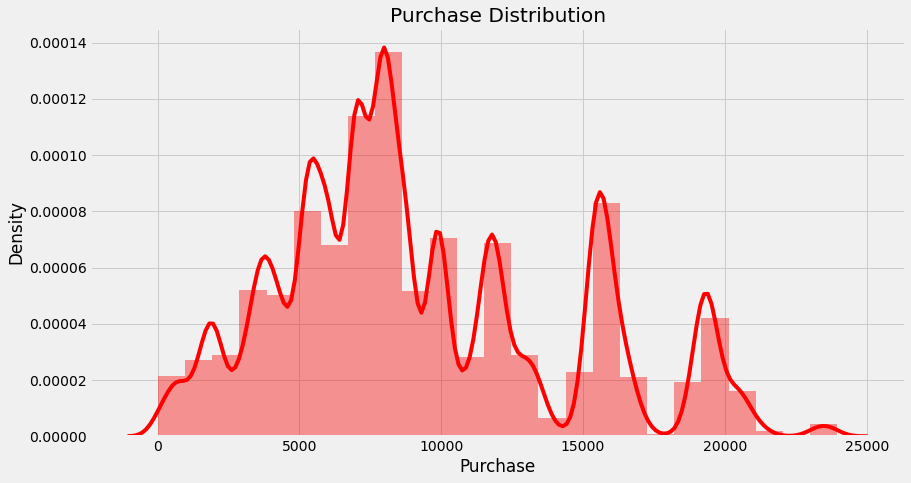

In [91]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(13,7))
sns.distplot(data["Purchase"],color='r',bins=25)
plt.title("Purchase Distribution")
plt.show()



We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.

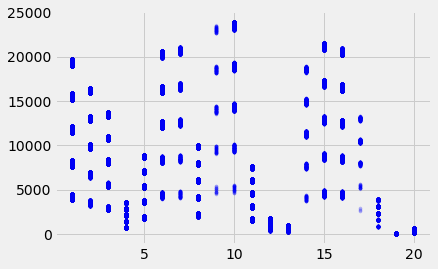

In [92]:
plt.scatter(data.Product_Category_1 ,data.Purchase,c='blue',alpha=0.1,s=10)
plt.show()

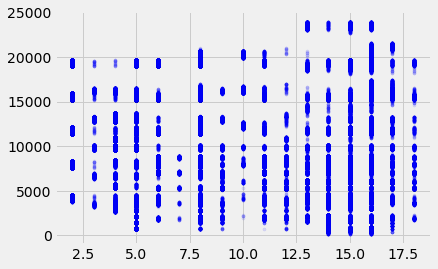

In [93]:
plt.scatter(data.Product_Category_2 ,data.Purchase,c='blue',alpha=0.1,s=10)
plt.show()

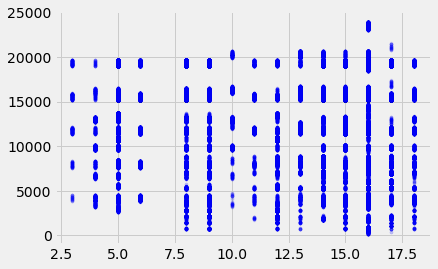

In [94]:
plt.scatter(data.Product_Category_3 ,data.Purchase,c='blue',alpha=0.1,s=10)
plt.show()

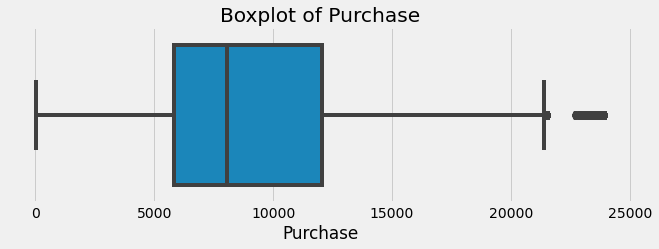

In [95]:
plt.figure(figsize=(10,3))
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [96]:
data["Purchase"].skew()

0.6001400037087128

In [97]:
data["Purchase"].kurtosis()

-0.3383775655851702

In [98]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

# Gender

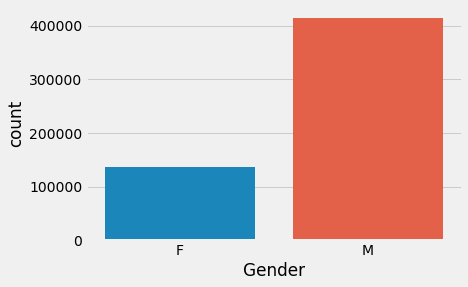

In [99]:
sns.countplot(data['Gender'])
plt.show()

In [100]:
data['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

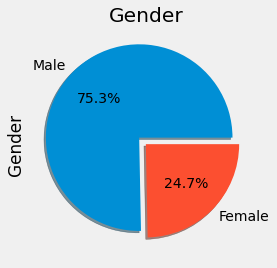

In [101]:
data["Gender"].value_counts().plot.pie(title="Gender", explode=(0.1, 0), labels=["Male", "Female"], autopct="%1.1f%%", shadow=True)
plt.show()

In [102]:
data.groupby("Gender").mean()["Purchase"]

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

# Marital Status

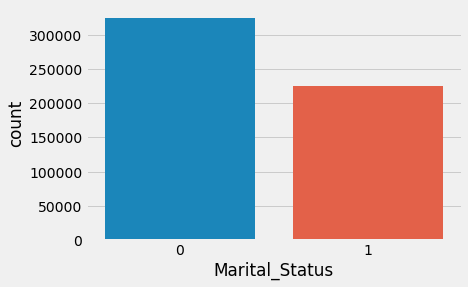

In [103]:
sns.countplot(data['Marital_Status'])
plt.show()

There are more unmarried people in the dataset who purchase more

In [104]:
data.groupby("Marital_Status").mean()["Purchase"]

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

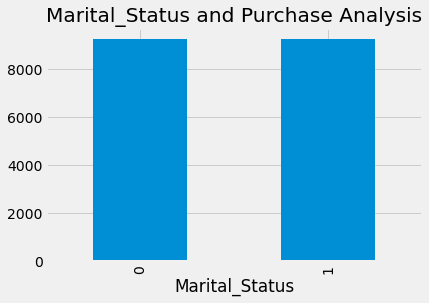

In [105]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

# Occupation

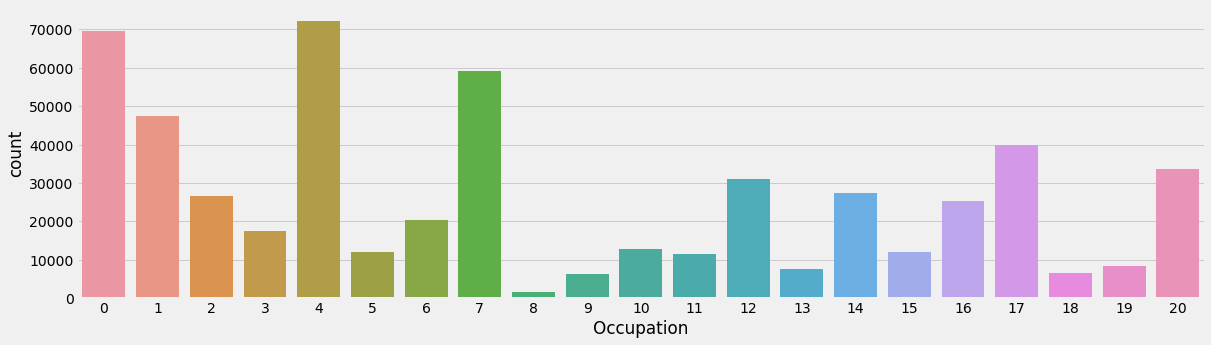

In [106]:
plt.figure(figsize=(18,5))
sns.countplot(data['Occupation'])
plt.show()

Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number

In [107]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


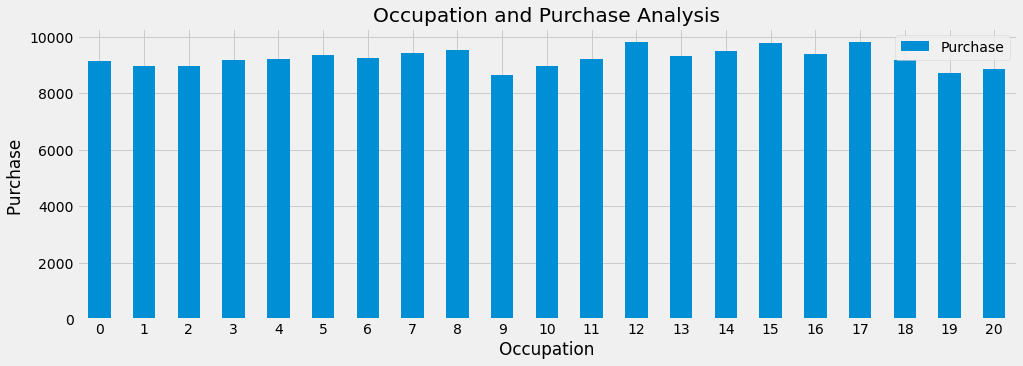

In [108]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.xlabel("Occupation")
plt.ylabel("Purchase ")
plt.xticks(rotation=0)
plt.show()

Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

# City_Category

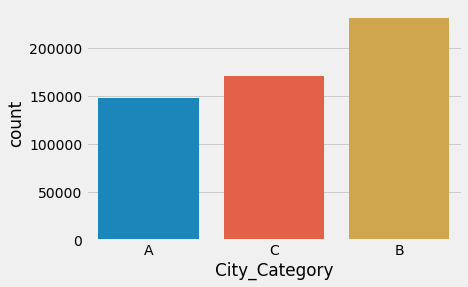

In [109]:
sns.countplot(data['City_Category'])
plt.show()

It is observed that city category B has made the most number of puchases.

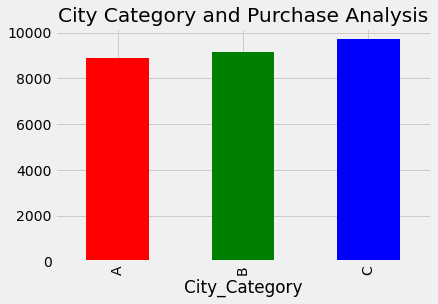

In [110]:
data.groupby("City_Category").mean()["Purchase"].plot(kind='bar',color=['r','g','b'])
plt.title("City Category and Purchase Analysis")
plt.show()

However, the city whose buyers spend the most is city type ‘C’.

# Stay_In_Current_City_Years

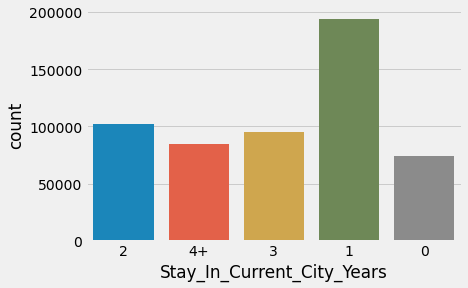

In [111]:
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

It looks like the longest time someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

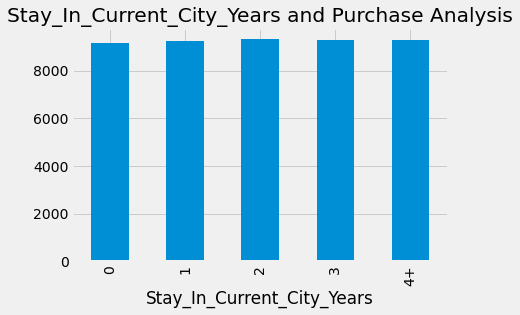

In [112]:
data.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()

We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

# Age

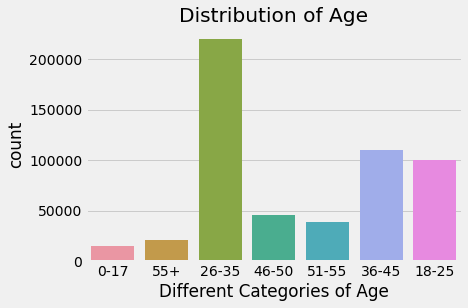

In [113]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group.

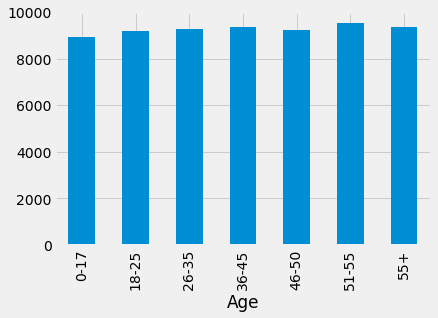

In [114]:
data.groupby("Age").mean()["Purchase"].plot(kind='bar')
plt.show()

Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

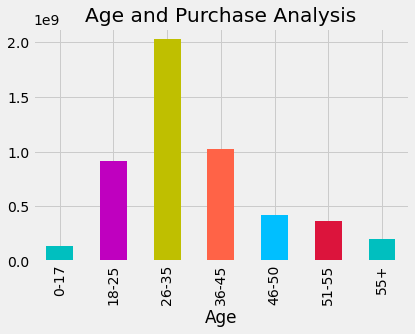

In [117]:
data.groupby("Age").sum()['Purchase'].plot(kind="bar",color=['c','m','y','tomato','deepskyblue','crimson'])
plt.title("Age and Purchase Analysis")
plt.show()

Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

# Product_Category_1

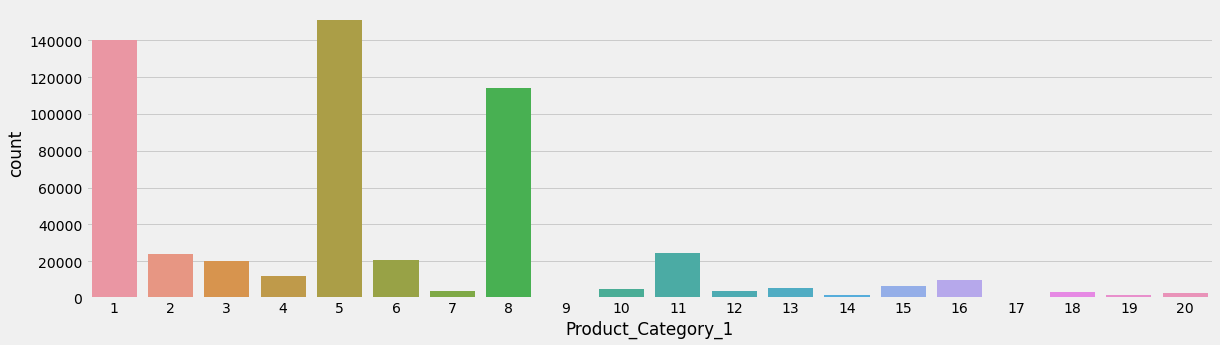

In [116]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_1'])
plt.show()

It is clear that Product_Category_1 numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

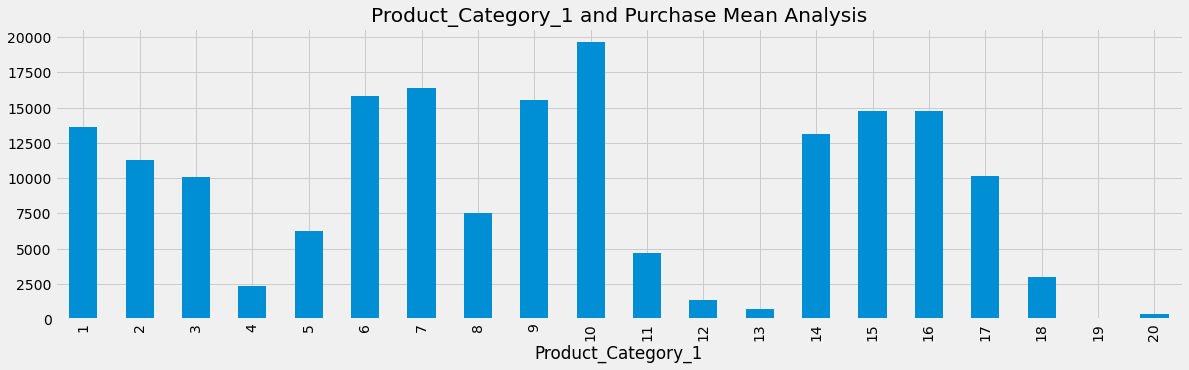

In [33]:
data.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

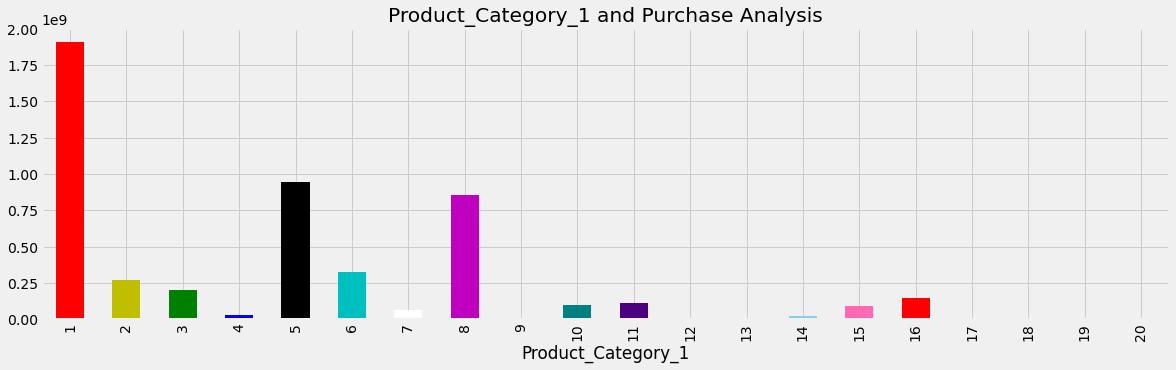

In [69]:
data.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5),color=['r','y','g','b','k','c','w','m','lime','teal','indigo','violet','orange','skyblue','hotpink'])
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()

The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.

# Product_Category_2

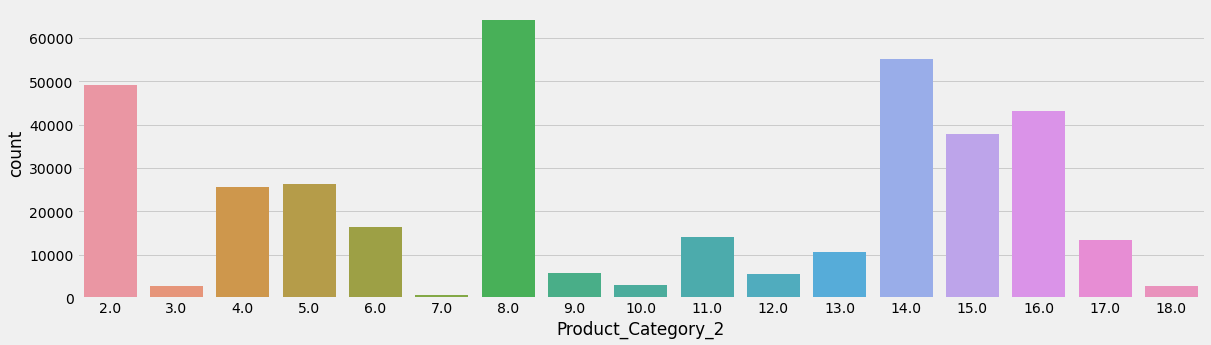

In [35]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_2'])
plt.show()

# Product_Category_3

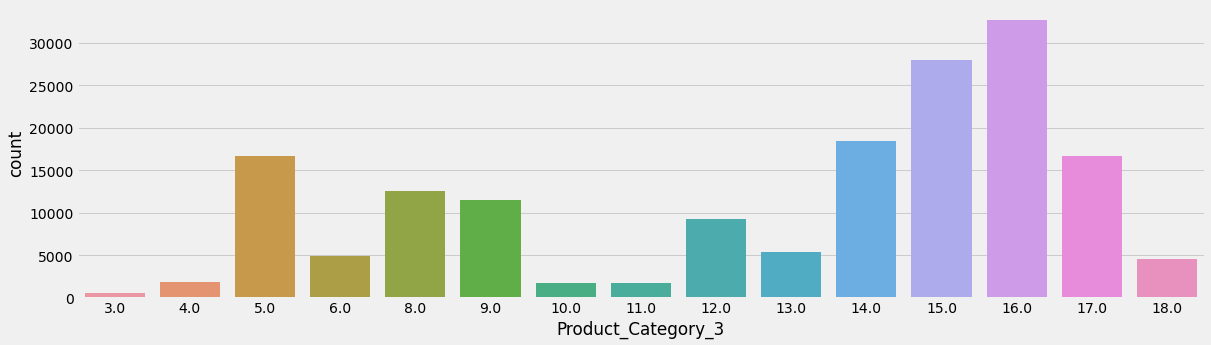

In [36]:
plt.figure(figsize=(18,5))
sns.countplot(data['Product_Category_3'])
plt.show()

In [37]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


# Preprocessing the dataset

# Checking Null values

In [38]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Null Value in percentage

In [39]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

There are 31% null values in the Product_Category_2 and 69% null values in the Product_Category_3

In [40]:
data['Product_Category_2'] =data['Product_Category_2'].fillna(0).astype('int64')
data['Product_Category_3'] =data['Product_Category_3'].fillna(0).astype('int64')

In [41]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [42]:
#encoading values using dict
Gender_dict= {'F':0, 'M':1}
data['Gender']= data['Gender'].apply(lambda x: Gender_dict[x])
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0,0,7969


In [43]:
# to improve the metrix use one hot encoading
#Encoding the categorical variables
#label encoding 
cols=['Age','City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
for col in cols:
    data[col]=lr.fit_transform(data[col])

data.head()    

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


# Coorealation matrix

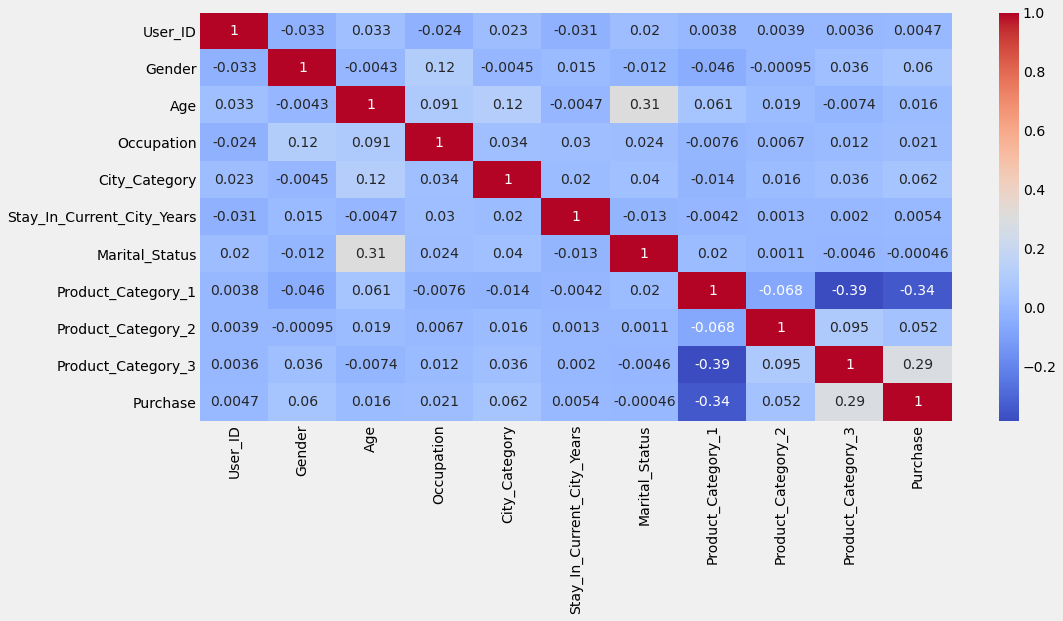

In [44]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

There is a some corellation between the product category groups.

# Input Split

In [45]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [46]:
x=data.drop(columns=['User_ID','Product_ID','Purchase'])
y=data['Purchase']

In [47]:
print(x)

        Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0            0    0          10              0                           2   
1            0    0          10              0                           2   
2            0    0          10              0                           2   
3            0    0          10              0                           2   
4            1    6          16              2                           4   
...        ...  ...         ...            ...                         ...   
550063       1    5          13              1                           1   
550064       0    2           1              2                           3   
550065       0    2          15              1                           4   
550066       0    6           1              2                           2   
550067       0    4           0              1                           4   

        Marital_Status  Product_Category_1  Product_Category_2 

# Model Training

In [48]:
from sklearn.model_selection  import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt
def train(model, x, y):
    #train-test split
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)
    
    #predict the results
    pred=model.predict(x_test)
    
    #cross validation
    cv_score= cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=5)
    cv_score= np.abs(np.mean(cv_score))
    
    
    print("Results")
    print("MAE:",mean_absolute_error(y_test, pred))
    print("MSE:", mean_squared_error(y_test, pred))
    print("R2_score:",(100*r2_score(y_test, pred)))
    print("RMSE of Linear Regression Model is:",np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:",np.sqrt(cv_score))

Results
MAE: 3527.5051888516186
MSE: 21355490.495925907
R2_score: 15.101193046390993
RMSE of Linear Regression Model is: 4621.200114248019
CV Score: 4628.367366331096


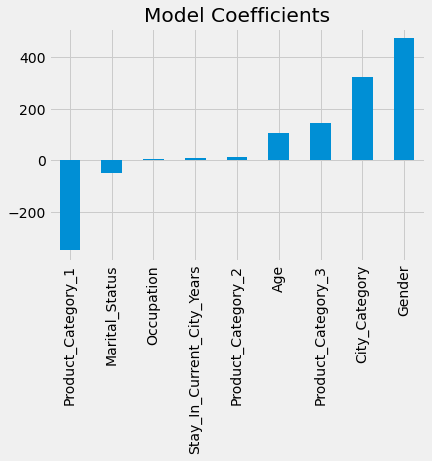

In [49]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
train(model,x,y)
coef=pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')
plt.show()

Results
MAE: 2373.7089472878747
MSE: 11318225.076376678
R2_score: 55.00436733119679
RMSE of Linear Regression Model is: 3364.2569872672743
CV Score: 3339.404761743085


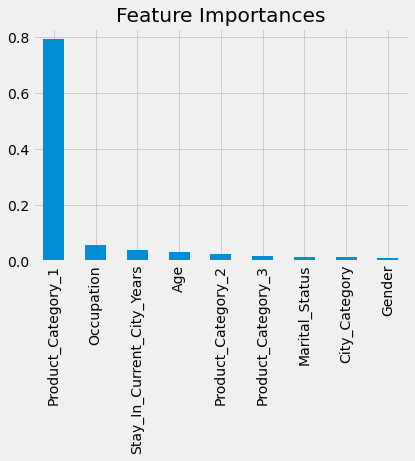

In [50]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
train(model,x,y)
features =pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind='bar',title='Feature Importances')
plt.show()


In [51]:
row=[[0,0,10,0,2,0,3,0,0]]
pred=model.predict(row)
print(pred)

[8370.]


Results
MAE: 2369.8818822400135
MSE: 10473013.40792193
R2_score: 58.3645084756377
RMSE of Linear Regression Model is: 3236.203548592383
CV Score: 3228.859760619926


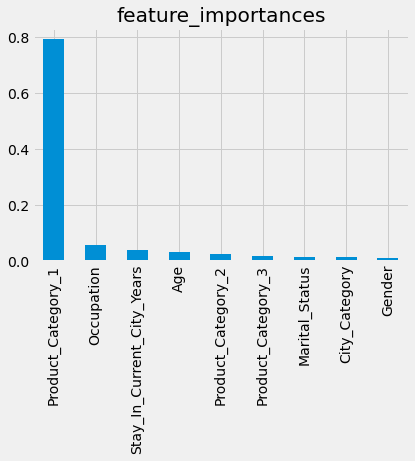

In [52]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_jobs=-1)
train(knn,x,y)

features = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
features.plot(kind='bar',title='feature_importances')
plt.show()



In [53]:
row=[[0,0,10,0,2,0,3,0,0]]
pred=model.predict(row)
print(pred)

[8370.]


Results
MAE: 2226.183359652196
MSE: 9372476.439531442
R2_score: 62.739696001417975
RMSE of Linear Regression Model is: 3061.4500550444136
CV Score: 3052.2345539182497


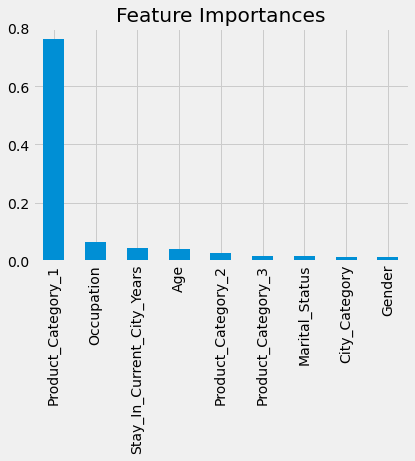

In [55]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1)
train(model,x,y)
features =pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind='bar',title='Feature Importances')
plt.show()



In [56]:
row=[[0,0,10,0,2,0,3,0,0]]
pred=model.predict(row)
print(pred)

[9562.89261905]


Results
MAE: 2153.4926842922014
MSE: 8322784.218633629
R2_score: 66.91275010381426
RMSE of Linear Regression Model is: 2884.923607070667
CV Score: 2880.717164606894


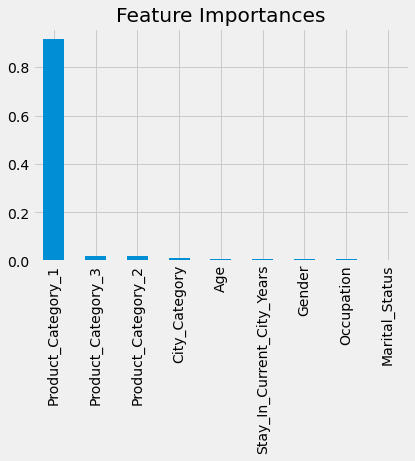

In [57]:
from xgboost.sklearn import XGBRegressor
#from sklearn.xgboost import XGBRegressor
#from sklearn.ensemble import RandomForestRegressor
model=XGBRegressor(n_jobs=-1)
train(model,x,y)
features =pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind='bar',title='Feature Importances')
plt.show()


In [58]:
from numpy import asarray
row=[0,0,10,0,2,0,3,0,0]
new_data=asarray([row])
pred=model.predict(new_data)
print(pred)

[11080.629]


The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2884.923607070667.